In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50

In [2]:
data = pd.read_csv('total_Oxide.csv')
data.drop(columns=['Phase'], inplace=True)
data

,Beamline,Year,Filename,Sample,Support,Temperature,He,H2,C2H2,C2H4,CH4,O2,Air,C7H12,Amp_ref,Amp_ref_error,Amp_spec,N_Pd-Pd,N_Pd-Pd_error,del_E0_Pd-Pd,del_E0_Pd-Pd_error,sigma2_Pd-Pd,sigma2_Pd-Pd_error,R_Pd-Pd,R_Pd-Pd_error,...,24875.00000000,24876.00000000,24877.00000000,24878.00000000,24879.00000000,24880.00000000,24881.00000000,24882.00000000,24883.00000000,24884.00000000,24885.00000000,24886.00000000,24887.00000000,24888.00000000,24889.00000000,24890.00000000,24891.00000000,24892.00000000,24893.00000000,24894.00000000,24895.00000000,24896.00000000,24897.00000000,24898.00000000,24899.00000000
0,ESRF_BM01B,2013,PdAl2O3_O2Reduction30min_t150_p1000.dat,Pd_Al2O3,Al2O3,150.015460,1,0,0,0,0,1,0,0,0.774269,0.030716,0.765,11.859227,0.643533,-1.167011,0.452476,0.010085,0.000538,2.738109,0.003860,...,1.002214,0.999926,1.003517,1.002998,1.001958,1.000847,1.001009,1.001462,1.002037,0.999767,1.002198,1.001132,1.001616,1.002216,1.002293,1.001052,1.000383,0.999355,0.999497,1.003794,1.001814,0.998966,1.001500,1.004075,1.000752
1,ESRF_BM01B,2013,PdAl2O3_Air_roomtemp.dat,Pd_Al2O3,Al2O3,25.005467,1,0,0,0,0,1,1,0,0.770932,0.025372,0.765,11.833535,1.233014,-1.969479,0.724529,0.010864,0.000899,2.755670,0.006598,...,1.002231,1.003317,1.002649,1.002720,1.003518,1.001802,1.001764,1.002180,1.001750,1.000724,1.000371,1.000715,0.999075,1.001425,1.001771,1.002257,1.003497,1.004304,1.004342,1.004847,1.003465,1.004045,1.001080,1.002649,1.001985
2,ESRF_BM01B,2014,TO291_25C_Air.dat,TO291,C,25.000000,1,0,0,0,0,1,1,0,0.874721,0.111306,0.870,11.003134,0.923039,0.014955,0.221952,0.006872,0.000233,2.729840,0.001523,...,1.001962,1.003073,1.003292,1.003089,1.003556,1.002497,1.002185,1.001607,1.003026,1.002913,1.003198,1.003381,1.003832,1.005836,1.004870,1.004099,1.003053,1.003821,1.003690,1.004759,1.004833,1.004265,1.003276,1.003146,1.004989
3,ESRF_BM31,2017,15 Pd_Al2O3_s1_O2-H2_110C_0-20_mono_1.dat,Pd_Al2O3,Al2O3,47.182793,1,1,0,0,0,1,1,0,0.782318,0.031527,0.785,2.361933,5.147741,-2.293459,13.017027,0.005742,0.014094,2.645649,0.082562,...,0.999426,0.997121,0.998099,0.996122,0.997909,0.999034,0.999075,0.997859,0.999798,0.997831,0.999484,0.996731,1.001275,0.997349,0.996353,1.000432,0.998555,1.004402,0.998351,1.002079,0.996785,1.003387,1.002360,0.998127,0.999321
4,ESRF_BM31,2017,15 Pd_Al2O3_s1_O2-H2_110C_0-20_mono_2.dat,Pd_Al2O3,Al2O3,81.605525,1,1,0,0,0,1,1,0,0.790608,0.036232,0.785,5.315702,2.262188,-0.303251,2.257770,0.007968,0.002811,2.736641,0.017854,...,1.000529,0.999587,0.998598,0.998032,1.000097,0.995122,0.998622,1.001988,0.998189,0.998479,0.994911,1.000015,1.001817,0.995933,0.995976,0.997201,0.997972,1.002062,0.997569,1.000702,0.997214,1.004074,0.999145,1.004466,1.003569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,ESRF_BM31,2021,TO326_S5_2_220C_1_H2_O2_mono_344.dat,TO326,Al2O3,219.697312,1,1,0,0,0,1,0,0,0.802228,0.043379,0.800,8.173951,1.602709,-3.579692,1.155286,0.009445,0.001391,2.706197,0.009437,...,1.000088,1.000061,1.000766,1.001350,1.000891,1.000477,1.000621,1.000761,1.000776,1.000816,1.001393,1.001911,1.001779,1.001650,1.001601,1.001522,1.000926,1.000329,1.001222,1.002155,1.001700,1.001132,1.001330,1.001751,1.001751
7104,ESRF_BM31,2021,TO326_S5_2_220C_1_H2_O2_mono_345.dat,TO326,Al2O3,219.990929,1,1,0,0,0,1,0,0,0.799404,0.041394,0.800,8.504541,1.608743,-3.286073,1.067766,0.009589,0.001305,2.708227,0.008880,...,1.001149,1.000991,1.000859,1.000950,1.001046,1.001175,1.001275,1.000611,0.999947,1.000399,1.000853,1.000997,1.001129,1.001170,1.001208,1.001263,1.001322,1.001542,1.001800,1.001462,1.000945,1.001044,1.001385,1.001396,1.001396
7105,ESRF_BM31,2021,TO326_S5_2_220C_1_H2_O2_mono_346.dat,TO326,Al2O3,220.053881,1,1,0,0,0,1,0,0,0.808236,0.058118,0.800,9.091107,2.102977,-3.266547,1.242617,0.009917,0.001550,2.708537,0.010560,...,1.000630,1.000845,1.000451,1.000050,1.000444,1.000890,1.001241

Рассмотрим только столбцы, не содержашие спектр

In [3]:
cols_without_spectr = data.columns[~data.columns.str.contains(r'\d+.0')]
data_no_spectr = data[cols_without_spectr]

In [4]:
data_no_spectr.describe()

,Year,Temperature,He,H2,C2H2,C2H4,CH4,O2,Air,C7H12,Amp_ref,Amp_ref_error,Amp_spec,N_Pd-Pd,N_Pd-Pd_error,del_E0_Pd-Pd,del_E0_Pd-Pd_error,sigma2_Pd-Pd,sigma2_Pd-Pd_error,R_Pd-Pd,R_Pd-Pd_error,N_Pd-O,N_Pd-O_error,del_E0_Pd-O,del_E0_Pd-O_error,sigma2_Pd-O,sigma2_Pd-O_error,R_Pd-O,R_Pd-O_error,Oxide_fraction,Oxide_fraction_error
count,7108.000000,7108.000000,7108.0,7108.000000,7108.0,7108.0,7108.000000,7108.000000,7108.000000,7108.0,7108.000000,7108.000000,7108.000000,6.578000e+03,6578.000000,6578.000000,6.578000e+03,6.578000e+03,6.578000e+03,6578.000000,6.578000e+03,7108.000000,7108.000000,7108.000000,7108.000000,7.108000e+03,7108.000000,7108.000000,7108.000000,7108.000000,6578.000000
mean,2020.975943,106.792277,1.0,0.528841,0.0,0.0,0.000844,0.714266,0.005487,0.0,0.803188,0.039705,0.799922,8.090465e+00,8.946868,-2.493550,5.779366e+05,9.985768e-03,7.830863e+02,2.711203,5.784680e+03,3.971540,0.035712,7.241556,3.410337,1.120986e-02,0.008813,2.038904,0.041962,0.534599,0.137747
std,0.328061,66.122912,0.0,0.499203,0.0,0.0,0.029044,0.451795,0.073874,0.0,0.005958,0.004625,0.001483,2.872521e+00,273.527787,1.636340,4.687332e+07,1.865605e-03,6.351190e+04,0.031870,4.691643e+05,0.162340,0.146698,5.050366,3.420393,1.319619e-02,0.017340,0.080528,0.064302,0.225839,0.165739
min,2013.000000,22.394392,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.739233,0.025372,0.765000,4.423048e-07,0.010862,-30.439629,2.198160e-01,2.733348e-10,2.103376e-04,2.488859,1.441335e-03,3.037181,0.000000,-41.624396,1.013526,1.054712e-16,0.000002,1.772388,0.007535,0.024450,0.027698
25%,2021.000000,50.010302,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.799959,0.037524,0.800000,5.284837e+00,0.765089,-3.125644,3.805575e-01,8.306851e-03,4.065159e-04,2.680689,2.764632e-03,4.000000,0.000000,4.582300,1.576562,4.284523e-03,0.001471,1.995833,0.011677,0.343455,0.045127
50%,2021.000000,99.883316,1.0,1.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.802760,0.038973,0.800000,7.941687e+00,1.559611,-2.533565,5.969980e-01,1.007035e-02,7.743397e-04,2.719960,5.239734e-03,4.000000,0.000000,5.411569,1.995537,4.844351e-03,0.001808,2.002634,0.014582,0.433059,0.089272
75%,2021.000000,155.999249,1.0,1.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.806406,0.040353,0.800000,1.007281e+01,3.575199,-2.303240,3.569136e+00,1.132878e-02,4.663130e-03,2.726518,3.210230e-02,4.000000,0.000000,6.179770,3.191026,7.282951e-03,0.003819,2.011750,0.027473,0.732226,0.115997
max,2021.000000,279.544684,1.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.874721,0.129595,0.870000,1.300000e+01,17008.066733,10.195251,3.801654e+09,2.648385e-02,5.151125e+06,2.833019,3.805151e+07,8.046050,6.678535,32.041668,105.391516,6.322445e-02,0.507645,2.310560,1.626241,1.000000,4.514046


In [5]:
data_no_spectr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7108 entries, 0 to 7107
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Beamline              7108 non-null   object 
 1   Year                  7108 non-null   int64  
 2   Filename              7108 non-null   object 
 3   Sample                7108 non-null   object 
 4   Support               7108 non-null   object 
 5   Temperature           7108 non-null   float64
 6   He                    7108 non-null   int64  
 7   H2                    7108 non-null   int64  
 8   C2H2                  7108 non-null   int64  
 9   C2H4                  7108 non-null   int64  
 10  CH4                   7108 non-null   int64  
 11  O2                    7108 non-null   int64  
 12  Air                   7108 non-null   int64  
 13  C7H12                 7108 non-null   int64  
 14  Amp_ref               7108 non-null   float64
 15  Amp_ref_error        

In [6]:
data_no_spectr[data_no_spectr['N_Pd-Pd_error'].isna()]

,Beamline,Year,Filename,Sample,Support,Temperature,He,H2,C2H2,C2H4,CH4,O2,Air,C7H12,Amp_ref,Amp_ref_error,Amp_spec,N_Pd-Pd,N_Pd-Pd_error,del_E0_Pd-Pd,del_E0_Pd-Pd_error,sigma2_Pd-Pd,sigma2_Pd-Pd_error,R_Pd-Pd,R_Pd-Pd_error,N_Pd-O,N_Pd-O_error,del_E0_Pd-O,del_E0_Pd-O_error,sigma2_Pd-O,sigma2_Pd-O_error,R_Pd-O,R_Pd-O_error,Oxide_fraction,Oxide_fraction_error,Time
40,ESRF_BM31,2021,TO302_0_50-200_H2_spec_1.dat,TO302,P4VP,49.554970,1,1,0,0,0,0,0,0,0.816312,0.050129,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.182642,0.621675,2.984763,2.235800,0.003578,0.002039,1.980826,0.016301,1.0,NaN,gy MonEx Ion1 Ion2 ZBlower1 ZBlower2
41,ESRF_BM31,2021,TO302_0_50-200_H2_spec_2.dat,TO302,P4VP,50.552806,1,1,0,0,0,0,0,0,0.809194,0.044637,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.026689,0.581810,3.156227,2.169624,0.002903,0.001900,1.980657,0.015455,1.0,NaN,gy MonEx Ion1 Ion2 ZBlower1 ZBlower2
42,ESRF_BM31,2021,TO302_0_50-200_H2_spec_3.dat,TO302,P4VP,52.033498,1,1,0,0,0,0,0,0,0.809633,0.044853,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.194026,0.595604,2.738379,2.145014,0.003633,0.001948,1.978970,0.015579,1.0,NaN,gy MonEx Ion1 Ion2 ZBlower1 ZBlower2
43,ESRF_BM31,2021,TO302_0_50-200_H2_spec_4.dat,TO302,P4VP,53.302055,1,1,0,0,0,0,0,0,0.810200,0.042311,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.051760,0.620621,3.422036,2.289125,0.003058,0.002044,1.983245,0.016517,1.0,NaN,gy MonEx Ion1 Ion2 ZBlower1 ZBlower2
44,ESRF_BM31,2021,TO302_0_50-200_H2_spec_5.dat,TO302,P4VP,54.086206,1,1,0,0,0,0,0,0,0.806736,0.043955,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.972809,0.576640,3.401627,2.170027,0.002916,0.001917,1.983209,0.015559,1.0,NaN,gy MonEx Ion1 Ion2 ZBlower1 ZBlower2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,ESRF_BM31,2021,TO326_S5_1a_260C_2_He_mono_8.dat,TO326,Al2O3,278.865336,1,0,0,0,0,0,0,0,0.804202,0.041695,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.986762,0.506571,5.147450,1.835502,0.003862,0.001827,2.001714,0.014257,1.0,NaN,Apr 05 03:53:43 2021
4233,ESRF_BM31,2021,TO326_S5_1a_260C_2_He_mono_9.dat,TO326,Al2O3,278.825711,1,0,0,0,0,0,0,0,0.811031,0.046818,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.024260,0.493919,5.042143,1.775341,0.004032,0.001781,2.001177,0.013842,1.0,NaN,Apr 05 03:53:55 2021
4234,ESRF_BM31,2021,TO326_S5_1a_260C_2_He_mono_10.dat,TO326,Al2O3,278.838281,1,0,0,0,0,0,0,0,0.804582,0.045944,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.949264,0.513134,5.302055,1.872244,0.003741,0.001859,2.002812,0.014531,1.0,NaN,Apr 05 03:54:06 2021
4235,ESRF_BM31,2021,TO326_S5_1a_260C_2_He_mono_11.dat,TO326,Al2O3,278.835870,1,0,0,0,0,0,0,0,0.807311,0.043160,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.004681,0.516085,5.028877,1.863814,0.004126,0.001880,2.001261,0.014576,1.0,NaN,Apr 05 03:54:18 2021


Можно видеть, что в столбцах C2H2, C2H4, C7H12 только нулевые значения, в столбце He - только 1, значит никакой информации они не несут. Удалим их

In [7]:
data_no_spectr.drop(columns=['C2H2', 'C2H4', 'C7H12', 'He'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
data_no_spectr.head()

,Beamline,Year,Filename,Sample,Support,Temperature,H2,CH4,O2,Air,Amp_ref,Amp_ref_error,Amp_spec,N_Pd-Pd,N_Pd-Pd_error,del_E0_Pd-Pd,del_E0_Pd-Pd_error,sigma2_Pd-Pd,sigma2_Pd-Pd_error,R_Pd-Pd,R_Pd-Pd_error,N_Pd-O,N_Pd-O_error,del_E0_Pd-O,del_E0_Pd-O_error,sigma2_Pd-O,sigma2_Pd-O_error,R_Pd-O,R_Pd-O_error,Oxide_fraction,Oxide_fraction_error,Time
0,ESRF_BM01B,2013,PdAl2O3_O2Reduction30min_t150_p1000.dat,Pd_Al2O3,Al2O3,150.015460,0,0,1,0,0.774269,0.030716,0.765,11.859227,0.643533,-1.167011,0.452476,0.010085,0.000538,2.738109,0.003860,4.0,0.0,14.639802,24.416201,4.909179e-12,0.002763,2.011073,0.173396,0.024450,0.049697,Mar 07 02:45:03 2013
1,ESRF_BM01B,2013,PdAl2O3_Air_roomtemp.dat,Pd_Al2O3,Al2O3,25.005467,0,0,1,1,0.770932,0.025372,0.765,11.833535,1.233014,-1.969479,0.724529,0.010864,0.000899,2.755670,0.006598,4.0,0.0,8.836565,3.368209,2.866529e-03,0.003149,1.993688,0.024812,0.294912,0.072102,Mar 07 01:09:34 2013
2,ESRF_BM01B,2014,TO291_25C_Air.dat,TO291,C,25.000000,0,0,1,1,0.874721,0.111306,0.870,11.003134,0.923039,0.014955,0.221952,0.006872,0.000233,2.729840,0.001523,4.0,0.0,7.548514,1.465538,9.825819e-03,0.001984,2.010082,0.013346,0.433057,0.047953,Oct 01 23:20:47 2014
3,ESRF_BM31,2017,15 Pd_Al2O3_s1_O2-H2_110C_0-20_mono_1.dat,Pd_Al2O3,Al2O3,47.182793,1,0,1,1,0.782318,0.031527,0.785,2.361933,5.147741,-2.293459,13.017027,0.005742,0.014094,2.645649,0.082562,4.0,0.0,7.374738,3.611893,5.503067e-03,0.003938,2.000572,0.028462,0.758588,0.193754,Dec 09 21:48:30 2017
4,ESRF_BM31,2017,15 Pd_Al2O3_s1_O2-H2_110C_0-20_mono_2.dat,Pd_Al2O3,Al2O3,81.605525,1,0,1,1,0.790608,0.036232,0.785,5.315702,2.262188,-0.303251,2.257770,0.007968,0.002811,2.736641,0.017854,4.0,0.0,0.932388,4.660428,6.544284e-03,0.004456,1.959479,0.033752,0.508215,0.152379,Dec 09 22:05:46 2017


Посмотрим на значения в столбцах с температурой и различными ошибками

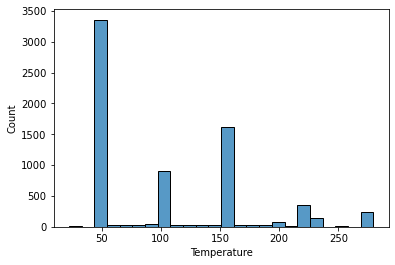

In [9]:
sns.histplot(data_no_spectr['Temperature'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


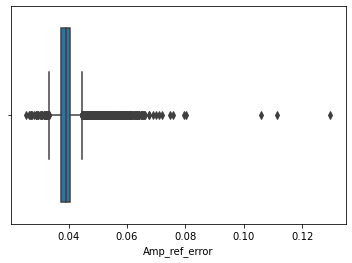

In [10]:
sns.boxplot(data_no_spectr['Amp_ref_error'])
plt.show()

In [11]:
data_no_spectr = data_no_spectr[data_no_spectr['Amp_ref_error'] < 0.08]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


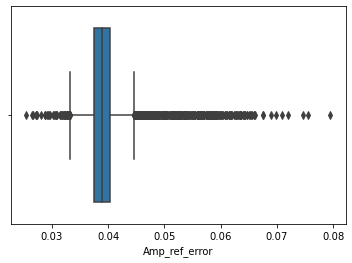

In [12]:
sns.boxplot(data_no_spectr['Amp_ref_error'])
plt.show()

Рассмотрим N_Pd-Pd_error

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


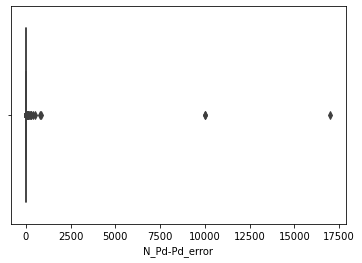

In [13]:
sns.boxplot(data_no_spectr['N_Pd-Pd_error'])
plt.show()

Видим выбросы. Посмотрим - сколько их.

In [14]:
data_no_spectr[data_no_spectr['N_Pd-Pd_error'] >= 1000]

,Beamline,Year,Filename,Sample,Support,Temperature,H2,CH4,O2,Air,Amp_ref,Amp_ref_error,Amp_spec,N_Pd-Pd,N_Pd-Pd_error,del_E0_Pd-Pd,del_E0_Pd-Pd_error,sigma2_Pd-Pd,sigma2_Pd-Pd_error,R_Pd-Pd,R_Pd-Pd_error,N_Pd-O,N_Pd-O_error,del_E0_Pd-O,del_E0_Pd-O_error,sigma2_Pd-O,sigma2_Pd-O_error,R_Pd-O,R_Pd-O_error,Oxide_fraction,Oxide_fraction_error,Time
3609,ESRF_BM31,2021,TO302_s2_1a_220C_1_He_mono_2.dat,TO302,P4VP,236.026036,0,0,0,0,0.747815,0.034102,0.8,12.999999,10029.900947,-2.906408,0.524106,0.008694,0.000397,2.732500,0.002931,4.0,0.0,17.493834,18.127627,0.061142,0.100668,2.231878,0.383840,0.357938,1.129525,Apr 03 07:09:49 2021
3618,ESRF_BM31,2021,TO302_s2_1a_220C_1_He_spec_2.dat,TO302,P4VP,236.026087,0,0,0,0,0.747774,0.034101,0.8,12.999999,10029.900947,-2.906408,0.524106,0.008694,0.000397,2.732500,0.002931,4.0,0.0,17.493834,18.127627,0.061142,0.100668,2.231878,0.383840,0.357938,1.129525,gy MonEx Ion1 Ion2 ZBlower1 ZBlower2
5612,ESRF_BM31,2021,TO326_S5_2_50C_3_H2_mono_288.dat,TO326,Al2O3,50.483491,1,0,0,0,0.811186,0.037899,0.8,12.999997,17008.066733,-2.482842,0.360988,0.007286,0.000324,2.750544,0.002123,4.0,0.0,17.658632,10.739134,0.042781,0.042719,2.206838,0.182541,0.309437,0.455356,Apr 05 09:21:34 2021


Удалим их из датасета

In [15]:
data_no_spectr = data_no_spectr[data_no_spectr['N_Pd-Pd_error'] < 1000]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


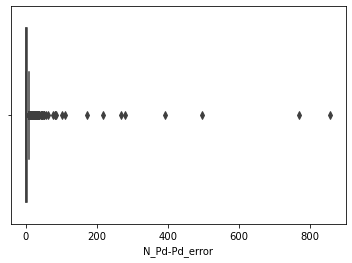

In [16]:
sns.boxplot(data_no_spectr['N_Pd-Pd_error'])
plt.show()

Снова выбросы. Работаем с ними

In [17]:
data_no_spectr[data_no_spectr['N_Pd-Pd_error'] >= 100]

,Beamline,Year,Filename,Sample,Support,Temperature,H2,CH4,O2,Air,Amp_ref,Amp_ref_error,Amp_spec,N_Pd-Pd,N_Pd-Pd_error,del_E0_Pd-Pd,del_E0_Pd-Pd_error,sigma2_Pd-Pd,sigma2_Pd-Pd_error,R_Pd-Pd,R_Pd-Pd_error,N_Pd-O,N_Pd-O_error,del_E0_Pd-O,del_E0_Pd-O_error,sigma2_Pd-O,sigma2_Pd-O_error,R_Pd-O,R_Pd-O_error,Oxide_fraction,Oxide_fraction_error,Time
10,ESRF_BM31,2017,03 Pd_Al2O3_s1_125_H2_mono_1.dat,Pd_Al2O3,Al2O3,86.046356,1,0,1,1,0.782619,0.033440,0.785,4.423048e-07,279.481822,-15.630080,3.801654e+09,0.017191,5.151125e+06,2.833019,3.805151e+07,4.0,0.0,10.128287,8.617847,0.014888,0.014685,2.037071,0.090121,0.886045,0.606034,Dec 09 11:12:50 2017
119,ESRF_BM31,2021,TO302_0_50-200_H2_spec_80.dat,TO302,P4VP,124.950336,1,0,0,0,0.804639,0.040874,0.800,1.299999e+01,767.648978,-29.125504,1.539730e+01,0.021598,2.115660e-02,2.541238,1.335757e-01,4.0,0.0,6.051092,3.996794,0.003241,0.002726,1.998369,0.025861,0.721972,0.170178,gy MonEx Ion1 Ion2 ZBlower1 ZBlower2
3730,ESRF_BM31,2021,TO326_3_150C_7_CH4_mono_2.dat,TO326,Al2O3,156.312327,0,1,0,0,0.796619,0.038314,0.800,1.299977e+01,266.032323,-3.431666,1.273024e+00,0.009995,1.226011e-03,2.735126,8.438979e-03,4.0,0.0,14.530720,105.391516,0.063224,0.507645,2.129436,1.626241,0.254743,4.514046,Apr 02 18:21:36 2021
5029,ESRF_BM31,2021,TO326_S5_2_50C_2_H2_mono_49.dat,TO326,Al2O3,50.482016,1,0,0,0,0.808042,0.036293,0.800,1.300000e+01,495.717140,-2.339686,3.986005e-01,0.007399,3.273350e-04,2.750242,2.258454e-03,4.0,0.0,18.227875,11.085687,0.043907,0.053101,2.226679,0.207111,0.303222,0.540888,Apr 05 06:17:11 2021
5106,ESRF_BM31,2021,TO326_S5_2_50C_2_H2_mono_127.dat,TO326,Al2O3,49.509664,1,0,0,0,0.806403,0.037458,0.800,1.300000e+01,109.098153,-2.312104,4.408888e-01,0.007250,3.375212e-04,2.750753,2.393208e-03,4.0,0.0,20.435029,10.230283,0.046077,0.056008,2.266463,0.215536,0.313458,0.565066,Apr 05 06:32:08 2021
5290,ESRF_BM31,2021,TO326_S5_2_50C_2_H2_mono_312.dat,TO326,Al2O3,49.286351,1,0,0,0,0.816968,0.050704,0.800,1.300000e+01,100.310364,-2.457423,4.484035e-01,0.007287,3.611418e-04,2.750207,2.497171e-03,4.0,0.0,18.965222,12.132462,0.046033,0.061946,2.231987,0.233549,0.310840,0.633222,Apr 05 07:07:32 2021
5541,ESRF_BM31,2021,TO326_S5_2_50C_3_H2_mono_217.dat,TO326,Al2O3,50.072846,1,0,0,0,0.804956,0.037042,0.800,1.300000e+01,390.798103,-2.374457,4.135353e-01,0.007331,3.340952e-04,2.751465,2.315090e-03,4.0,0.0,18.116182,12.542263,0.046098,0.061863,2.228406,0.238106,0.302217,0.620175,Apr 05 09:07:57 2021
5586,ESRF_BM31,2021,TO326_S5_2_50C_3_H2_mono_262.dat,TO326,Al2O3,49.803241,1,0,0,0,0.808388,0.038722,0.800,1.300000e+01,855.873361,-2.427553,3.930373e-01,0.007247,3.253283e-04,2.750696,2.220697e-03,4.0,0.0,18.118745,10.755468,0.043903,0.051001,2.217597,0.196562,0.312567,0.536579,Apr 05 09:16:35 2021
5634,ESRF_BM31,2021,TO326_S5_2_50C_3_H2_mono_310.dat,TO326,Al2O3,50.634308,1,0,0,0,0.807989,0.035063,0.800,1.300000e+01,172.169295,-2.349132,4.099557e-01,0.007075,3.266336e-04,2.750436,2.255883e-03,4.0,0.0,19.730412,9.307052,0.043684,0.047539,2.240758,0.181041,0.322354,0.505310,Apr 05 09:25:47 2021
6405,ESRF_BM31,2021,TO326_S5_2_150C_1_H2_O2_mono_2.dat,TO326,Al2O3,156.374241,1,0,1,0,0.797311,0.036735,0.800,1.300000e+01,216.274520,-1.344622,7.597245e-01,0.006476,7.535694e-04,2.740848,4.920005e-03,4.0,0.0,4.586822,6.408584,0.015673,0.009651,2.002548,0.059779,0.543396,0.264466,Apr 05 17:42:34 2021


Удаляем из датасета

In [18]:
data_no_spectr = data_no_spectr[data_no_spectr['N_Pd-Pd_error'] < 100]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


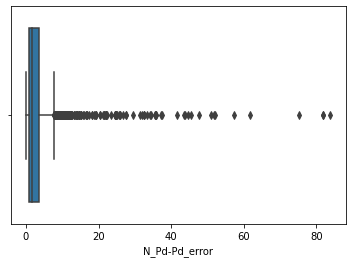

In [19]:
sns.boxplot(data_no_spectr['N_Pd-Pd_error'])
plt.show()

По-прежнему много выбросов.

In [20]:
data_no_spectr[data_no_spectr['N_Pd-Pd_error'] >= 20].shape[0]

54

In [21]:
data_no_spectr = data_no_spectr[data_no_spectr['N_Pd-Pd_error'] < 20]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


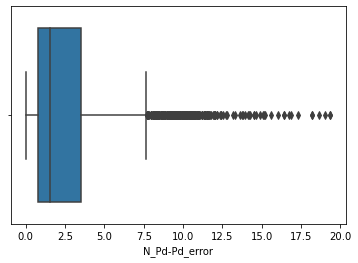

In [22]:
sns.boxplot(data_no_spectr['N_Pd-Pd_error'])
plt.show()

Рассмотрим del_E0_Pd-Pd_error

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


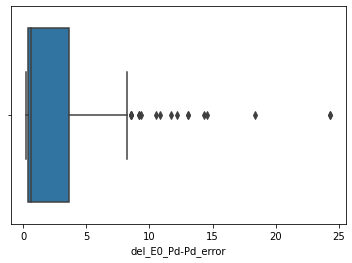

In [23]:
sns.boxplot(data_no_spectr['del_E0_Pd-Pd_error'])
plt.show()

Рассмотрим sigma2_Pd-Pd_error

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


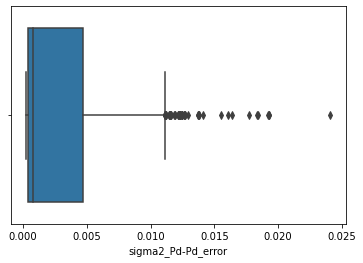

In [24]:
sns.boxplot(data_no_spectr['sigma2_Pd-Pd_error'])
plt.show()

Рассмотрим R_Pd-Pd_error

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


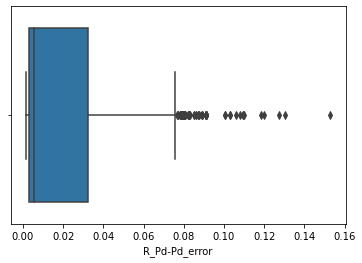

In [25]:
sns.boxplot(data_no_spectr['R_Pd-Pd_error'])
plt.show()

In [26]:
data_to_predict = data_no_spectr[['Temperature', 
                                  'Amp_ref_error', 
                                  'N_Pd-Pd_error', 
                                  'del_E0_Pd-Pd_error', 
                                  'sigma2_Pd-Pd_error', 
                                  'R_Pd-Pd_error']]
data_to_predict.head()


,Temperature,Amp_ref_error,N_Pd-Pd_error,del_E0_Pd-Pd_error,sigma2_Pd-Pd_error,R_Pd-Pd_error
0,150.015460,0.030716,0.643533,0.452476,0.000538,0.003860
1,25.005467,0.025372,1.233014,0.724529,0.000899,0.006598
3,47.182793,0.031527,5.147741,13.017027,0.014094,0.082562
4,81.605525,0.036232,2.262188,2.257770,0.002811,0.017854
5,108.268839,0.050288,5.737360,3.369788,0.006679,0.050322


Посмотрим на итоговые распределения управляемых праметров

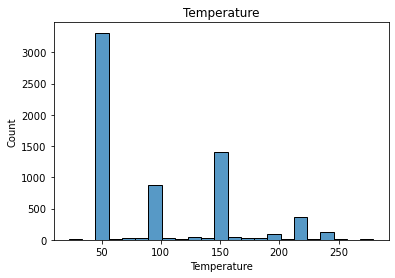

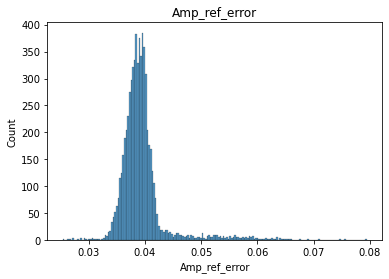

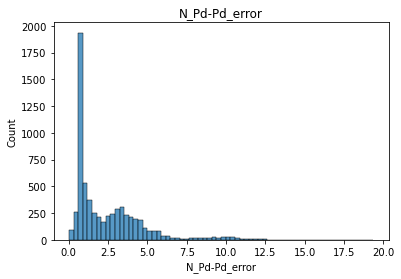

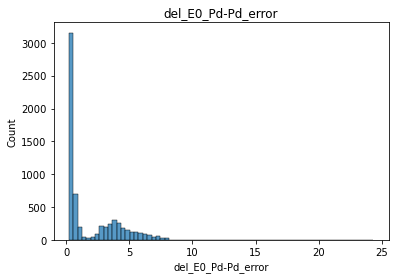

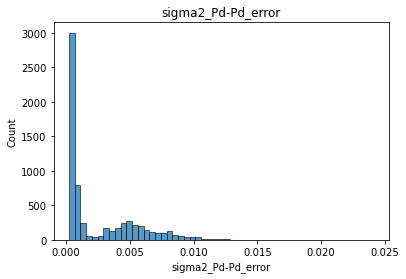

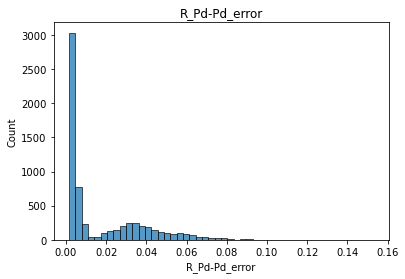

In [27]:
for col in data_to_predict.columns:
    plt.title(col)
    sns.histplot(data_to_predict[col])
    plt.savefig(f'{col}_distr.jpg')
    plt.show()

In [28]:
data_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6509 entries, 0 to 7107
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         6509 non-null   float64
 1   Amp_ref_error       6509 non-null   float64
 2   N_Pd-Pd_error       6509 non-null   float64
 3   del_E0_Pd-Pd_error  6509 non-null   float64
 4   sigma2_Pd-Pd_error  6509 non-null   float64
 5   R_Pd-Pd_error       6509 non-null   float64
dtypes: float64(6)
memory usage: 356.0 KB


## Preprocessing

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

Возьмем столбцы со спектром и поработаем с ними

In [30]:
cols_spectr = data.columns[data.columns.str.contains(r'\d+.0')]
data_spectr = data[cols_spectr]
data_spectr.head()

,24350.00000000,24351.00000000,24352.00000000,24353.00000000,24354.00000000,24355.00000000,24356.00000000,24357.00000000,24358.00000000,24359.00000000,24360.00000000,24361.00000000,24362.00000000,24363.00000000,24364.00000000,24365.00000000,24366.00000000,24367.00000000,24368.00000000,24369.00000000,24370.00000000,24371.00000000,24372.00000000,24373.00000000,24374.00000000,...,24875.00000000,24876.00000000,24877.00000000,24878.00000000,24879.00000000,24880.00000000,24881.00000000,24882.00000000,24883.00000000,24884.00000000,24885.00000000,24886.00000000,24887.00000000,24888.00000000,24889.00000000,24890.00000000,24891.00000000,24892.00000000,24893.00000000,24894.00000000,24895.00000000,24896.00000000,24897.00000000,24898.00000000,24899.00000000
0,0.486132,0.529536,0.575770,0.624897,0.675425,0.726348,0.780451,0.832091,0.874919,0.909698,0.934497,0.951723,0.959797,0.963577,0.964148,0.961296,0.953728,0.941543,0.931415,0.921057,0.913798,0.905926,0.899740,0.903828,0.907493,...,1.002214,0.999926,1.003517,1.002998,1.001958,1.000847,1.001009,1.001462,1.002037,0.999767,1.002198,1.001132,1.001616,1.002216,1.002293,1.001052,1.000383,0.999355,0.999497,1.003794,1.001814,0.998966,1.001500,1.004075,1.000752
1,0.458128,0.505183,0.549730,0.595658,0.644162,0.699032,0.754842,0.805847,0.851493,0.892365,0.926695,0.952668,0.972139,0.982428,0.988990,0.994251,0.987793,0.982732,0.975961,0.966018,0.961194,0.952369,0.950634,0.950144,0.954021,...,1.002231,1.003317,1.002649,1.002720,1.003518,1.001802,1.001764,1.002180,1.001750,1.000724,1.000371,1.000715,0.999075,1.001425,1.001771,1.002257,1.003497,1.004304,1.004342,1.004847,1.003465,1.004045,1.001080,1.002649,1.001985
2,0.469199,0.512392,0.559998,0.603468,0.655299,0.709369,0.763004,0.811490,0.857732,0.901142,0.936902,0.963291,0.981266,0.992808,0.998939,1.000922,0.997336,0.989981,0.982430,0.975113,0.967761,0.963026,0.957996,0.955995,0.956270,...,1.001962,1.003073,1.003292,1.003089,1.003556,1.002497,1.002185,1.001607,1.003026,1.002913,1.003198,1.003381,1.003832,1.005836,1.004870,1.004099,1.003053,1.003821,1.003690,1.004759,1.004833,1.004265,1.003276,1.003146,1.004989
3,0.426640,0.488504,0.536915,0.578796,0.632219,0.677899,0.728345,0.777002,0.830950,0.881521,0.933403,0.969930,0.999067,1.019431,1.036711,1.043307,1.048957,1.051205,1.050973,1.048644,1.045462,1.043184,1.040705,1.037486,1.031813,...,0.999426,0.997121,0.998099,0.996122,0.997909,0.999034,0.999075,0.997859,0.999798,0.997831,0.999484,0.996731,1.001275,0.997349,0.996353,1.000432,0.998555,1.004402,0.998351,1.002079,0.996785,1.003387,1.002360,0.998127,0.999321
4,0.464705,0.520185,0.566904,0.613610,0.663907,0.714400,0.763835,0.808753,0.858435,0.906152,0.943958,0.970894,0.992526,1.006117,1.012206,1.018570,1.013788,1.013944,1.012044,1.009313,1.008212,1.008481,1.006036,1.000091,0.999134,...,1.000529,0.999587,0.998598,0.998032,1.000097,0.995122,0.998622,1.001988,0.998189,0.998479,0.994911,1.000015,1.001817,0.995933,0.995976,0.997201,0.997972,1.002062,0.997569,1.000702,0.997214,1.004074,0.999145,1.004466,1.003569


Избавимся от сильно коррелирующих признаков

In [31]:
corr_map = data_spectr.corr()

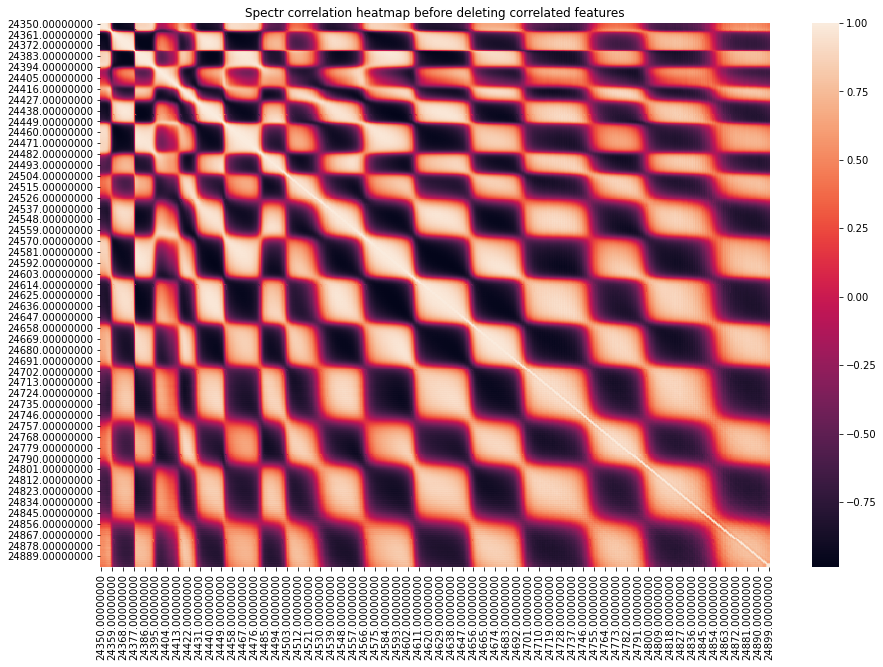

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_map)
plt.title('Spectr correlation heatmap before deleting correlated features')
plt.savefig('corr_heatmap_before.jpg')
plt.show()

In [33]:
corr_map.shape

(550, 550)

Выберем пороговое значени для коэффициента корреляции в 0.8 (можно варьировать)

In [34]:
corr_thresh = 0.99

In [35]:
correlated_features = set()

for i in range(corr_map.shape[0]):
    for j in range(i):
        if abs(corr_map.iloc[i, j]) > corr_thresh:
            colname = corr_map.columns[i]
            correlated_features.add(colname)

In [36]:
data_spectr.drop(columns=correlated_features, inplace=True)
corr_map = data_spectr.corr()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


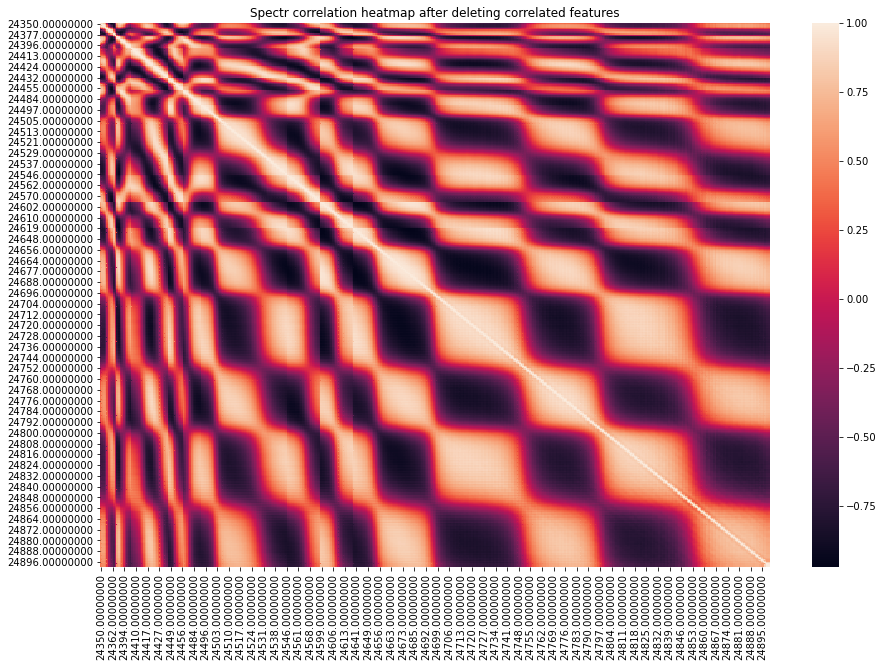

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_map)
plt.title('Spectr correlation heatmap after deleting correlated features')
plt.savefig('corr_heatmap_after.jpg')
plt.show()

In [38]:
corr_map.shape

(404, 404)

In [39]:
#ss = StandardScaler()
mm = MinMaxScaler()
#scaled = ss.fit_transform(df)
scaled = mm.fit_transform(data_spectr)
scaled

array([[0.31740382, 0.32926664, 0.35470548, ..., 0.60818569, 0.72898534,
        0.36254505],
       [0.20944003, 0.19350406, 0.20021567, ..., 0.55882898, 0.57123885,
        0.49939122],
       [0.25212038, 0.23676979, 0.23343444, ..., 0.8165241 , 0.62617908,
        0.83300195],
       ...,
       [0.52572005, 0.69367594, 0.709452  , ..., 0.61881673, 0.48761242,
        0.48930306],
       [0.5385393 , 0.69670467, 0.72022927, ..., 0.51615264, 0.34315456,
        0.34434434],
       [0.52923114, 0.67440018, 0.69114872, ..., 0.56736517, 0.45652601,
        0.45810887]])

In [40]:
dt = pd.DataFrame(scaled)
#d_temp = dt[[650,651,652,653]]
d_save = dt
#dt = dt.drop(columns=[650,651,652,653])
#d_temp.head()
dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403
0,0.317404,0.329267,0.354705,0.360178,0.269577,0.079932,0.000000,0.050251,0.000000,0.000000,0.000000,0.306878,1.000000,1.000000,0.860273,0.688912,0.414746,0.201137,0.175932,0.047608,0.032351,0.040966,0.056933,0.032846,0.069916,...,0.647817,0.338570,0.601390,0.691776,0.681205,0.545038,0.537072,0.601563,0.587322,0.345563,0.716185,0.481561,0.679177,0.638649,0.572714,0.489660,0.403025,0.307926,0.281527,0.713935,0.616327,0.290365,0.608186,0.728985,0.362545
1,0.209440,0.193504,0.200216,0.187009,0.103751,0.000000,0.009763,0.157775,0.290444,0.356583,0.414405,0.502525,0.638809,0.632344,0.476470,0.343531,0.157868,0.000785,0.000000,0.123002,0.141554,0.179217,0.237421,0.240284,0.334891,...,0.649772,0.628758,0.551219,0.664880,0.836687,0.636042,0.615608,0.663943,0.558354,0.433660,0.541461,0.447775,0.452209,0.559704,0.530537,0.612419,0.730920,0.901733,0.762770,0.818549,0.818815,0.966262,0.558829,0.571239,0.499391
2,0.252120,0.236770,0.233434,0.233132,0.187724,0.104573,0.119546,0.237284,0.240976,0.217373,0.189032,0.314632,0.817013,0.847451,0.730891,0.577582,0.451643,0.229872,0.147634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.619475,0.607899,0.588417,0.700625,0.840467,0.702168,0.659396,0.614164,0.687122,0.635199,0.811739,0.664098,0.877137,1.000000,0.780849,0.800024,0.684095,0.843764,0.697976,0.809810,0.986376,0.995583,0.816524,0.626179,0.833002
3,0.088042,0.053031,0.030416,0.035154,0.000000,0.068725,0.188159,0.392370,0.725566,0.743613,0.674832,0.483743,0.456419,0.513236,0.510760,0.521080,0.508157,0.580489,0.630234,0.406501,0.321383,0.437654,0.271025,0.240276,0.332111,...,0.333873,0.098464,0.288096,0.025636,0.277485,0.372408,0.336090,0.288740,0.361382,0.167271,0.456567,0.124491,0.648695,0.152984,0.093002,0.426559,0.210527,0.913467,0.167676,0.543643,0.000000,0.878737,0.709039,0.070775,0.203572
4,0.234796,0.241179,0.217325,0.238328,0.235650,0.176857,0.198121,0.335386,0.526179,0.534934,0.475021,0.424339,0.612197,0.707446,0.718516,0.717283,0.715152,0.694654,0.689076,0.488732,0.546977,0.599043,0.465129,0.472756,0.404332,...,0.458128,0.309523,0.316978,0.210666,0.495679,0.000000,0.288999,0.647288,0.198921,0.226904,0.019310,0.390958,0.697150,0.011616,0.062553,0.097536,0.149098,0.632677,0.090021,0.406860,0.052607,0.970079,0.331838,0.772324,0.675319


Метод главных компонент не нужен при значении порога коэффициента корреляции в 0.8

In [41]:
pca_test = PCA(n_components=scaled.shape[1])
pca_test.fit(scaled)

PCA(n_components=404)

In [42]:
n_features = 10

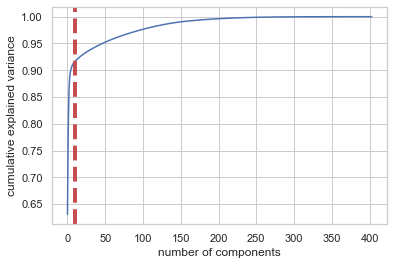

In [43]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=n_features, ymin=0, ymax=1)
plt.show()
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

<AxesSubplot:>

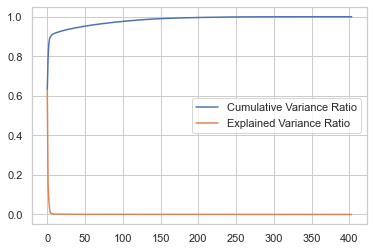

In [44]:
pca_df.plot()

In [45]:
pca = PCA(n_components=n_features)
pca.fit(scaled)
train = pca.transform(scaled)
train

array([[ 2.63004324e+00, -1.20631154e+00, -1.08416734e+00, ...,
         2.52409459e-01, -4.71116783e-01,  3.07551062e-01],
       [ 1.26003364e+00,  5.14396495e-01,  8.14340228e-01, ...,
         3.56200410e-01,  4.91618885e-01, -1.75477648e-01],
       [ 3.00180522e+00, -2.37829113e+00, -1.38881366e+00, ...,
        -9.94699930e-01,  1.48413103e-01, -1.37912794e-01],
       ...,
       [-5.26642267e-01, -5.87580078e-01,  1.64909695e-01, ...,
         1.81528331e-01,  1.33708570e-01, -7.12365425e-03],
       [-4.84527062e-01, -5.71933669e-01,  1.58532081e-01, ...,
         1.21515782e-01, -1.14027395e-03, -4.00133815e-02],
       [-5.24617348e-01, -6.26102096e-01,  1.84461275e-01, ...,
         1.72149025e-01,  1.13851832e-01,  6.47676194e-02]])

In [46]:
dp = pd.DataFrame(train)
dp.head()

,0,1,2,3,4,5,6,7,8,9
0,2.630043,-1.206312,-1.084167,0.080463,-1.542360,0.795462,-0.116622,0.252409,-0.471117,0.307551
1,1.260034,0.514396,0.814340,0.325032,-1.324251,0.536301,0.180524,0.356200,0.491619,-0.175478
2,3.001805,-2.378291,-1.388814,-0.150484,-1.410633,0.657452,-0.302865,-0.994700,0.148413,-0.137913
3,-1.874236,-0.413607,0.472323,-1.581939,0.007328,0.110715,0.548007,-0.244597,-0.030704,0.271586
4,-0.803269,0.457873,-0.611046,0.640488,-0.930348,0.027075,-0.359287,-0.237651,-0.139629,0.974942


Сформируем train, test выборки для загрузки в ANFIS

In [47]:
df = pd.concat([dp.iloc[data_to_predict.index], data_to_predict], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,Temperature,Amp_ref_error,N_Pd-Pd_error,del_E0_Pd-Pd_error,sigma2_Pd-Pd_error,R_Pd-Pd_error
0,2.630043,-1.206312,-1.084167,0.080463,-1.542360,0.795462,-0.116622,0.252409,-0.471117,0.307551,150.015460,0.030716,0.643533,0.452476,0.000538,0.003860
1,1.260034,0.514396,0.814340,0.325032,-1.324251,0.536301,0.180524,0.356200,0.491619,-0.175478,25.005467,0.025372,1.233014,0.724529,0.000899,0.006598
3,-1.874236,-0.413607,0.472323,-1.581939,0.007328,0.110715,0.548007,-0.244597,-0.030704,0.271586,47.182793,0.031527,5.147741,13.017027,0.014094,0.082562
4,-0.803269,0.457873,-0.611046,0.640488,-0.930348,0.027075,-0.359287,-0.237651,-0.139629,0.974942,81.605525,0.036232,2.262188,2.257770,0.002811,0.017854
5,-1.372150,1.592040,-0.788275,-0.966313,0.001767,0.338801,-1.415456,-0.081307,1.452024,0.334664,108.268839,0.050288,5.737360,3.369788,0.006679,0.050322


In [48]:
df.reset_index(drop=True, inplace=True)

In [49]:
train = df.iloc[:int(df.shape[0] * 0.7)]
test = df.iloc[int(df.shape[0] * 0.7):]
print(train.shape)
print(test.shape)

(4556, 16)
(1953, 16)


In [50]:
train.to_excel('train.xlsx')
test.to_excel('test.xlsx')

In [51]:
out = df.drop(columns=['Temperature', 
                       'Amp_ref_error', 
                       'N_Pd-Pd_error', 
                       'del_E0_Pd-Pd_error', 
                       'sigma2_Pd-Pd_error', 
                       'R_Pd-Pd_error'])
out.shape

(6509, 10)

In [52]:
out.to_excel('out.xlsx')